In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, metrics


In [51]:
import os
for dirname, _, filenames in os.walk('/home/anass/Documents/digitrecognition'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/anass/Documents/digitrecognition/Digit_RecognitionCNN.ipynb
/home/anass/Documents/digitrecognition/train.csv
/home/anass/Documents/digitrecognition/sample_submission.csv
/home/anass/Documents/digitrecognition/test.csv
/home/anass/Documents/digitrecognition/.ipynb_checkpoints/Digit_RecognitionCNN-checkpoint.ipynb


In [52]:
train_data = pd.read_csv("/home/anass/Documents/digitrecognition/train.csv")
test_data=pd.read_csv("/home/anass/Documents/digitrecognition/test.csv")
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


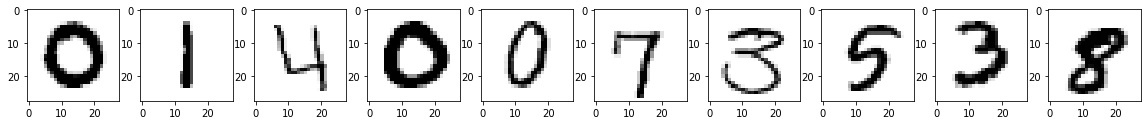

In [53]:
plt.figure(figsize=(20,20))
for i in range(1,11):
    q=train_data.iloc[i:i+1,1:].values
    plt.subplot(10,10,i)
  #Assuming these are square images
  #sqrt of 784 is 28
    plt.imshow(q.reshape(28,28),cmap=plt.cm.binary)

In [54]:
size=28
x_train = train_data.drop(['label'], axis=1).astype('float32').values.reshape(-1,size,size,1)
y_train = train_data['label'].astype('int32')
x_test = test_data.values.reshape(-1,size,size,1)
y_test = test_data.values.reshape(-1,size,size,1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((42000, 28, 28, 1), (42000,), (28000, 28, 28, 1), (28000, 28, 28, 1))

In [66]:
model = models.Sequential()
model.add(layers.Conv2D(128, 
                        (3, 3), 
                        activation='relu',
                        input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [67]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 3, 3, 128)         147584    
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 1, 1, 128)      

In [71]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              #loss_weights=[1, 100],
              metrics=['accuracy'])


In [72]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    callbacks=[callback],
)


Epoch 1/20
1313/1313 [==============================] - 93s 70ms/step - loss: 0.2659 - accuracy: 0.9227
Epoch 2/20
1313/1313 [==============================] - 93s 71ms/step - loss: 0.0902 - accuracy: 0.9732
Epoch 3/20
1313/1313 [==============================] - 110s 83ms/step - loss: 0.0711 - accuracy: 0.9791
Epoch 4/20
1313/1313 [==============================] - 109s 83ms/step - loss: 0.0579 - accuracy: 0.9824
Epoch 5/20
1313/1313 [==============================] - 123s 94ms/step - loss: 0.0503 - accuracy: 0.9854
Epoch 6/20
1313/1313 [==============================] - 124s 94ms/step - loss: 0.0456 - accuracy: 0.9865
Epoch 7/20
1313/1313 [==============================] - 112s 85ms/step - loss: 0.0389 - accuracy: 0.9887
Epoch 8/20
1313/1313 [==============================] - 119s 91ms/step - loss: 0.0337 - accuracy: 0.9901
Epoch 9/20
1313/1313 [==============================] - 113s 86ms/step - loss: 0.0311 - accuracy: 0.9912
Epoch 10/20
1313/1313 [==============================] - 

In [79]:
model_filename="Digit_Prediction_BA.h5"
models.save_model(model, model_filename)


model.evaluate(x=x_test[10:], y=y_test[10:])


875/875 [==============================] - 15s 17ms/step - loss: 0.0078 - accuracy: 1.0000


[0.007798229344189167, 1.0]

875/875 [==============================] - 16s 19ms/step
prediction 7


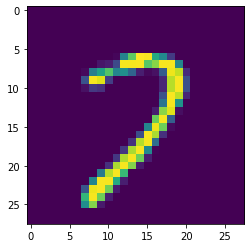

In [81]:
y_test = model.predict(x_test)
y_test = np.argmax(y_test,axis=1)
plt.imshow(x_test[11])
print("prediction",y_test[11])

875/875 [==============================] - 16s 18ms/step
prediction 0
875/875 [==============================] - 27s 30ms/step
prediction 9
875/875 [==============================] - 29s 33ms/step
prediction 9
875/875 [==============================] - 21s 24ms/step
prediction 3
875/875 [==============================] - 19s 21ms/step
prediction 7
875/875 [==============================] - 17s 20ms/step
prediction 0
875/875 [==============================] - 18s 20ms/step
prediction 3
875/875 [==============================] - 25s 28ms/step
prediction 0
875/875 [==============================] - 18s 20ms/step
prediction 3


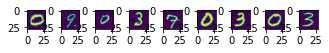

In [84]:
for i in range(1,10):
    q=train_data.iloc[i:i+1,1:].values
    plt.subplot(10,10,i)
  #Assuming these are square images
  #sqrt of 784 is 28
    plt.imshow(q.reshape(28,28),cmap=plt.cm.binary)
    y_test = model.predict(x_test)
    y_test = np.argmax(y_test,axis=1)
    plt.imshow(x_test[i])
    print("prediction",y_test[i])